In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
from paramselect import fit
dbf = fit('input.json', datasets)

FITTING:  LIQUID
2 endmembers (2 distinct by symmetry)
ENDMEMBER: ('AL',)
SYMMETRIC_ENDMEMBERS:  [('AL',)]
ENDMEMBER: ('NI',)
SYMMETRIC_ENDMEMBERS:  [('NI',)]
1 distinct binary interactions
INTERACTION: (('AL', 'NI'),)
ENDMEMBERS FROM INTERACTION: [('AL',), ('NI',)]
['CPM_FORM', 'CPM_MIX']: datasets found: 0
['SM_FORM', 'SM_MIX']: datasets found: 0
['HM_FORM', 'HM_MIX']: datasets found: 1
[YS] rss: 94032758.7985 AIC: 350.82392177
[YS, YS*Z] rss: 74222612.3634 AIC: 348.3290088
[YS, YS*Z, YS*Z**2] rss: 5870112.86861 AIC: 302.122303974
[YS, YS*Z, YS*Z**2, YS*Z**3] rss: 5504592.61518 AIC: 302.900773131
[[  4.46250000e-03   0.00000000e+00  -1.05187500e-03]
 [  0.00000000e+00   5.01187500e-03  -2.28253089e-20]
 [ -1.05187500e-03  -2.28253089e-20   4.69136250e-04]]
[-197437.0 14423.4 61412.5 0.0 0 0 0 0 0 0]
FITTING:  BCC_B2
9 endmembers (6 distinct by symmetry)
ENDMEMBER: ('AL', 'AL', 'VA')
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'NI', 'VA')
['CPM_FORM']: datasets found

/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [3]:
from paramselect import multi_phase_fit
import pycalphad.variables as v
from pycalphad import equilibrium
multi_phase_fit(dbf, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()), datasets)

{'T': 780, 'P': 101325}
('AL3NI5', 'FCC_L12')
[0]
OrderedDict([(T, array([780])), (P, array([101325])), (X_NI, [0.625, 0.733])])
{P: 101325.0, T: 780.0, X_NI: 0.625}
Components: AL NI VA
Phases: AL3NI5 FCC_L12 [done]
Computing initial grid [419 points, 55.4KB]
Computing convex hull [iteration 1]
progress 133190.770877 [1 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 0 [FCC_L12]
Rebuilding grid [421 points, 55.7KB]
Computing convex hull [iteration 2]
progress 9.54605638981e-09 [0 conditions updated]
Global search complete
Refining equilibrium
Chem pot progress 0.0
Energy progress -7.10570020601e-08
No progress
{P: 101325.0, T: 780.0, X_NI: 0.73299999999999998}
Components: AL NI VA
Phases: AL3NI5 FCC_L12 [done]
Computing initial grid [419 points, 55.4KB]
Computing convex hull [iteration 1]
progress 133190.770877 [1 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 0 [FCC_L12]
Rebuilding grid [421 points, 55.7KB]
Computing convex hull 

In [4]:
print(dbf.to_string(fmt='tdb', groupby='phase'))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$ Date: 2016-02-29 15:16
$ Components: AL, NI, VA
$ Phases: AL3NI1, AL3NI2, AL3NI5, BCC_B2, FCC_L12, LIQUID
$ Generated by rotis (pycalphad 0.3.2+7.g82410c5)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

ELEMENT AL BLANK 0 0 0 !
ELEMENT NI BLANK 0 0 0 !
ELEMENT VA BLANK 0 0 0 !

FUNCTION GBCCAL 298.15 -4.813*T + GHSERAL# + 10083; 2900.0 N !
FUNCTION GBCCNI 298.15 -3.556*T + GHSERNI# + 8715.084; 3000.0 N !
FUNCTION GFCCAL 298.15 GHSERAL#; 2900.0 N !
FUNCTION GFCCNI 298.15 GHSERNI#; 3000.0 N !
FUNCTION GHSERAL 298.15 -8.77664E-7*T**3 - 0.001884662*T**2 -
   24.3671976*T*LN(T) + 137.093038*T - 7976.15 + 74092*T**(-1); 700.0 Y
   -5.764227E-6*T**3 + 0.018531982*T**2 - 38.5844296*T*LN(T) + 223.048446*T -
   11276.24 + 74092*T**(-1); 933.47 Y -31.748192*T*LN(T) + 188.684153*T -
   11278.378 - 1.230524E+28*T**(-9); 2900.0 N !
FUNCTION GHSERNI 298.15 -0.0048407*T**2 - 22.096*T*LN(T)

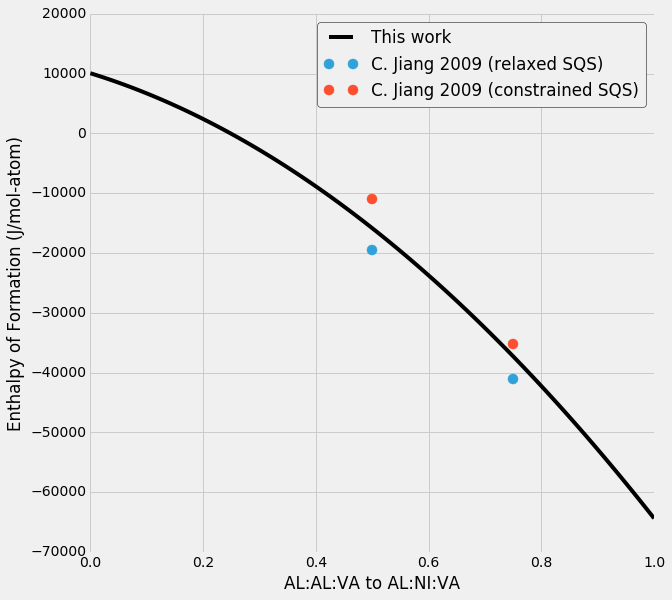

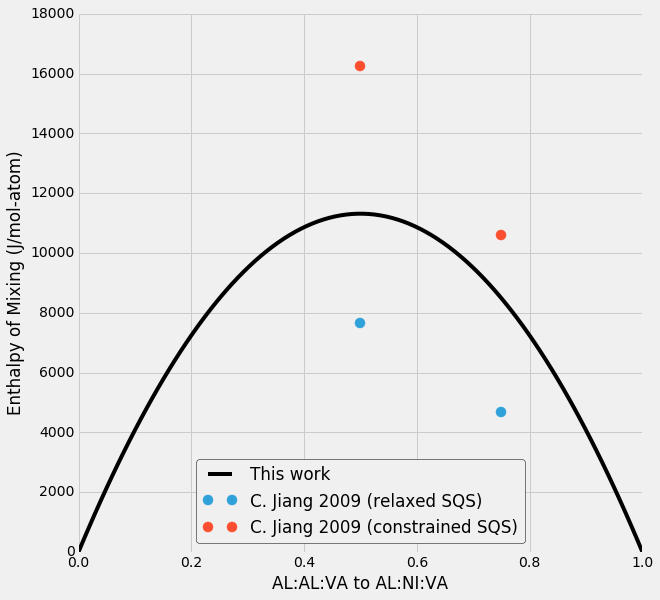

In [5]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", ["AL", "NI"], "VA"], [[0, 1]], datasets)

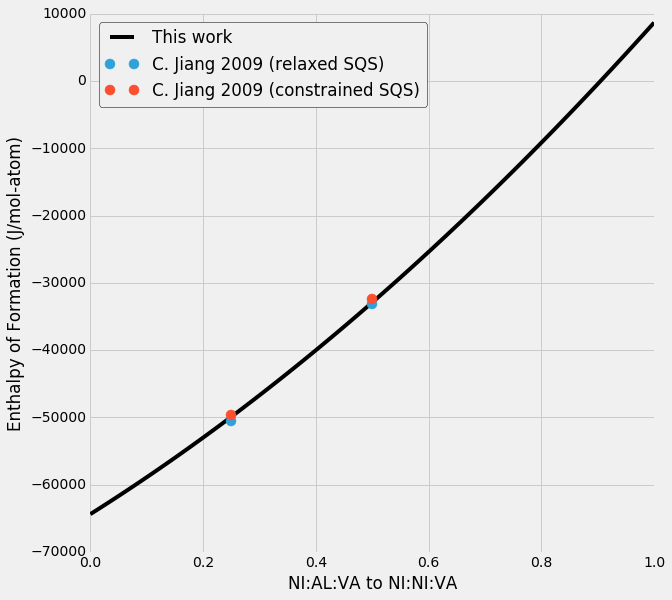

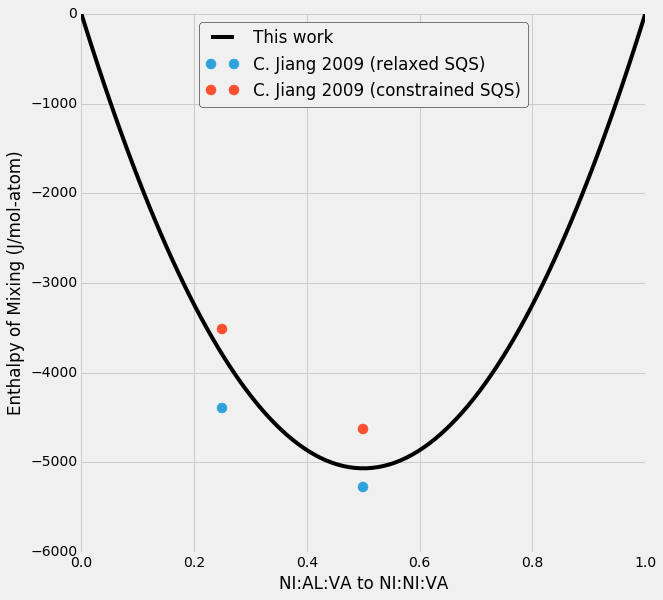

In [6]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["NI", ["AL", "NI"], "VA"], [[0, 1]], datasets)

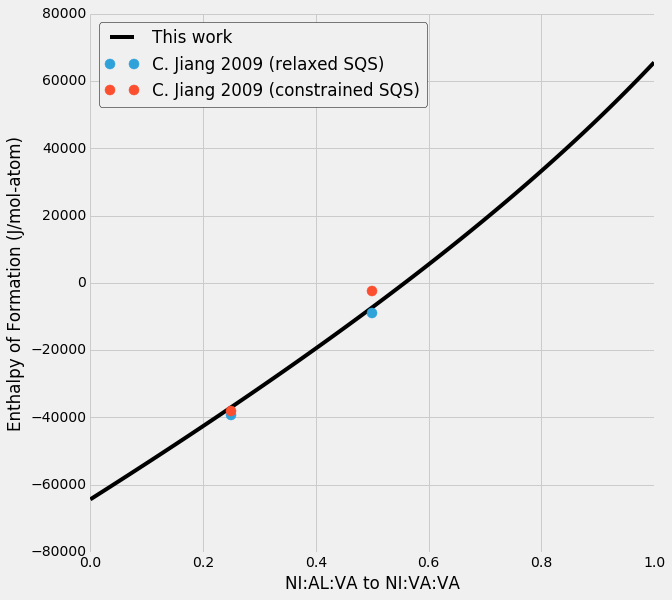

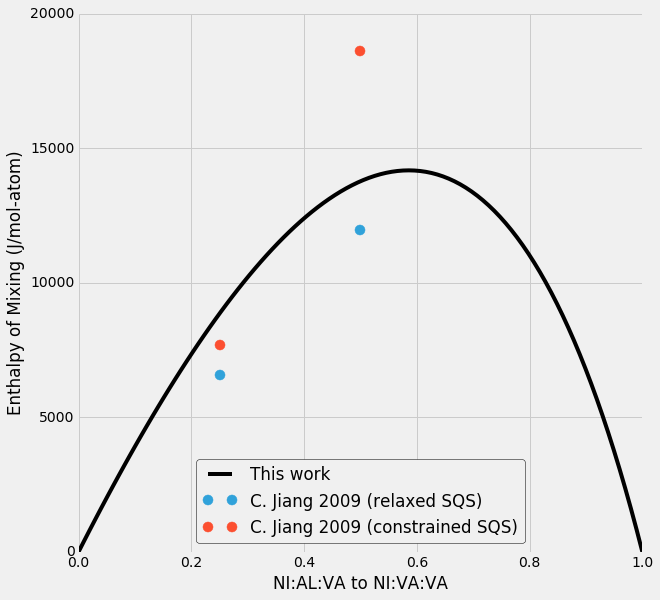

In [7]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["NI", ["AL", "VA"], "VA"], [[0, 1]], datasets)

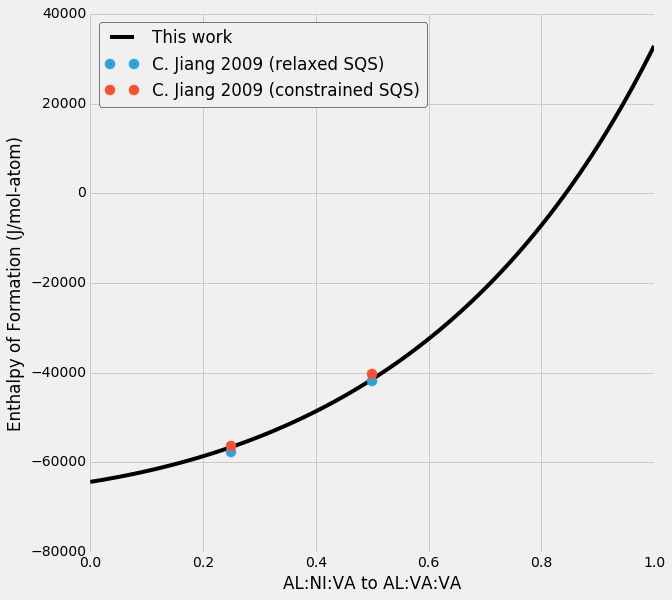

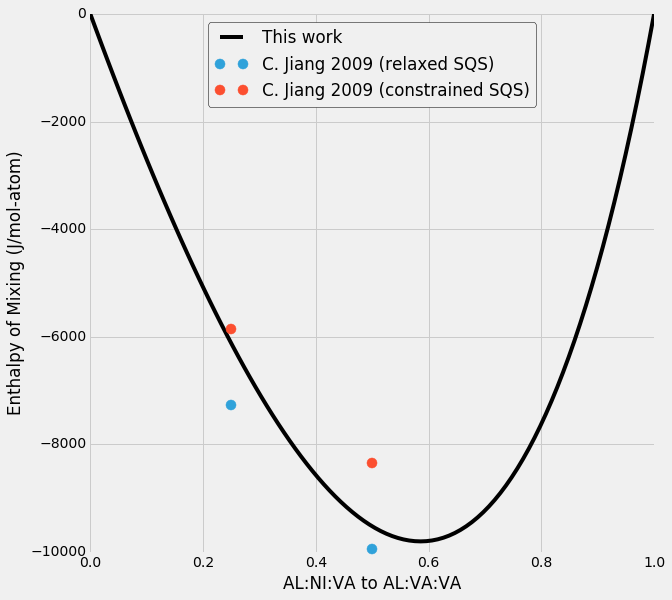

In [8]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", ["NI", "VA"], "VA"], [[0, 1]], datasets)

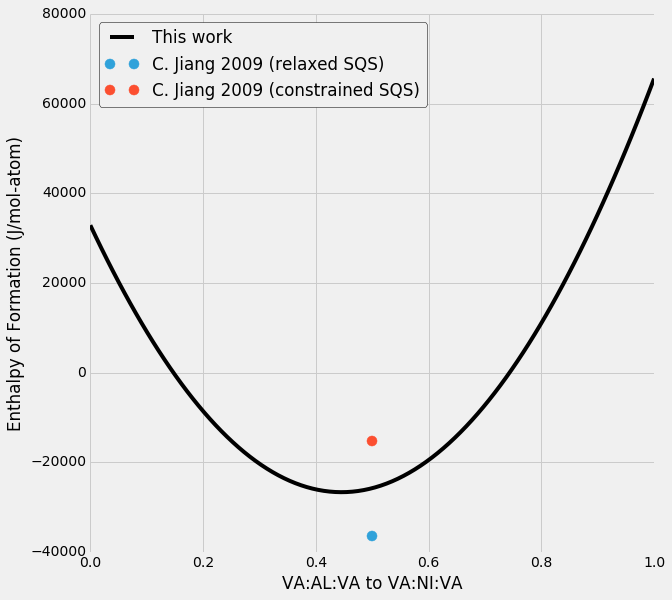

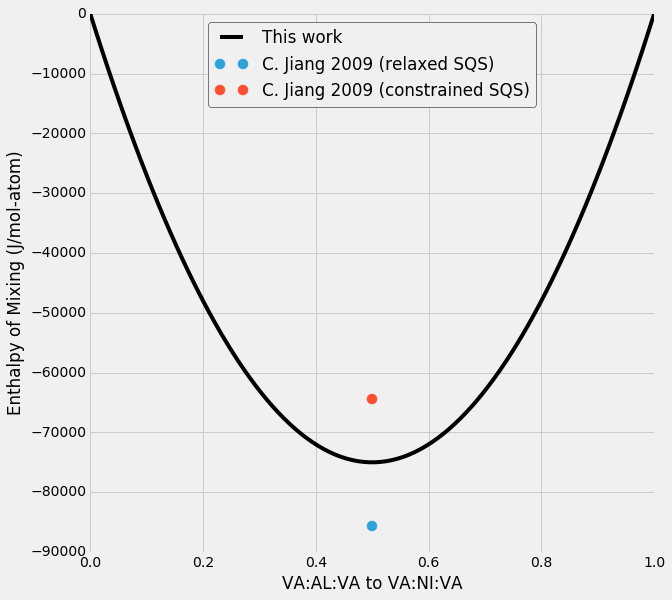

In [9]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["VA", ["AL", "NI"], "VA"], [[0, 1]], datasets)

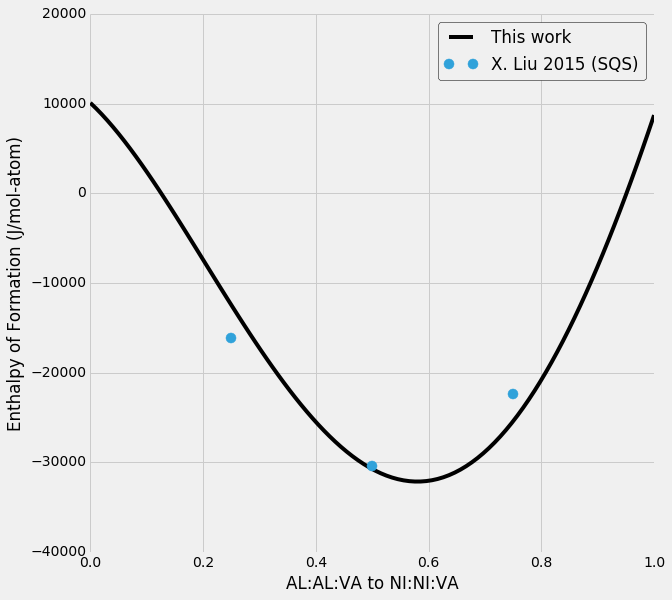

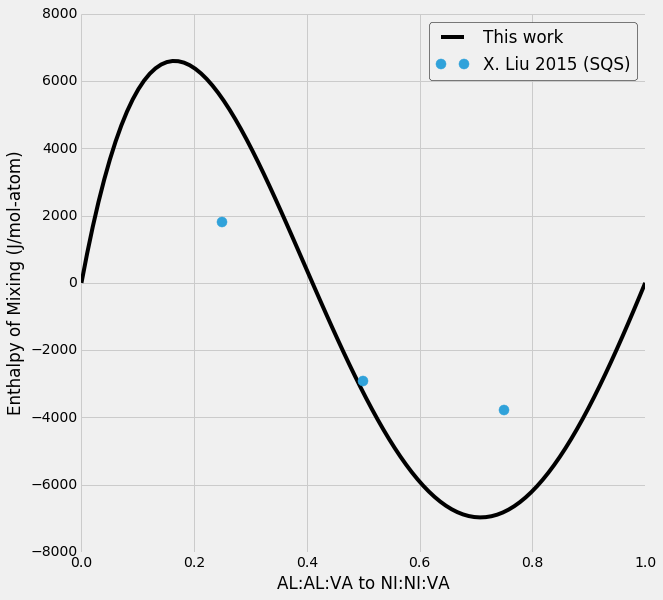

In [10]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", [["AL", "NI"], ["AL", "NI"], "VA"], [[0, 1]], datasets)

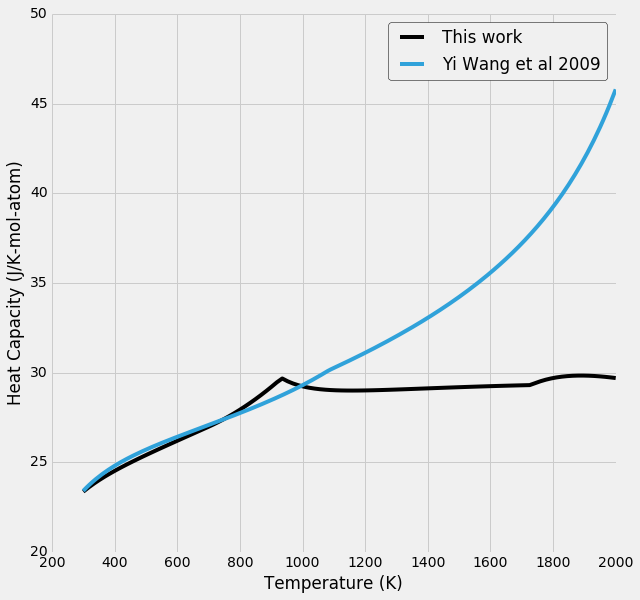

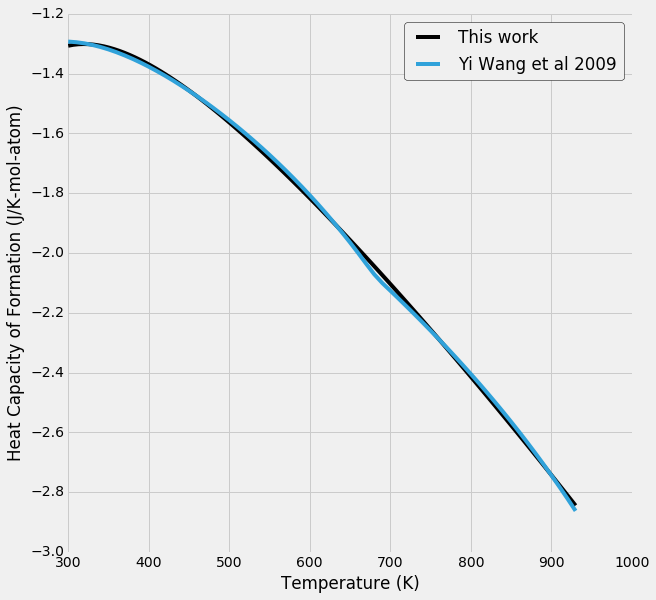

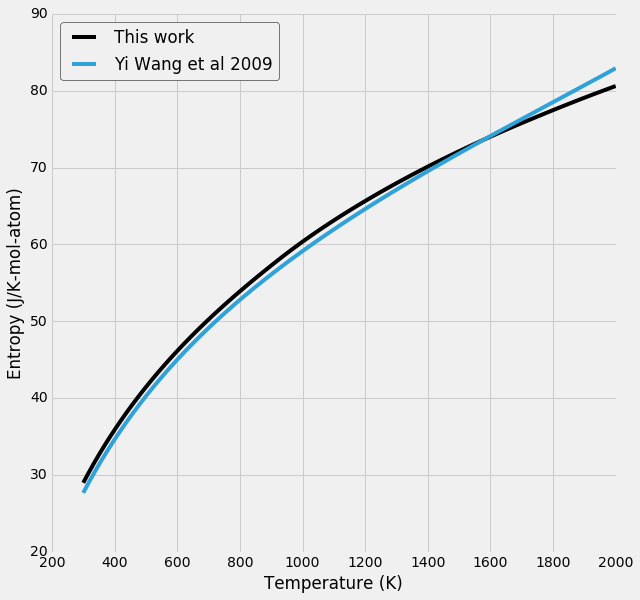

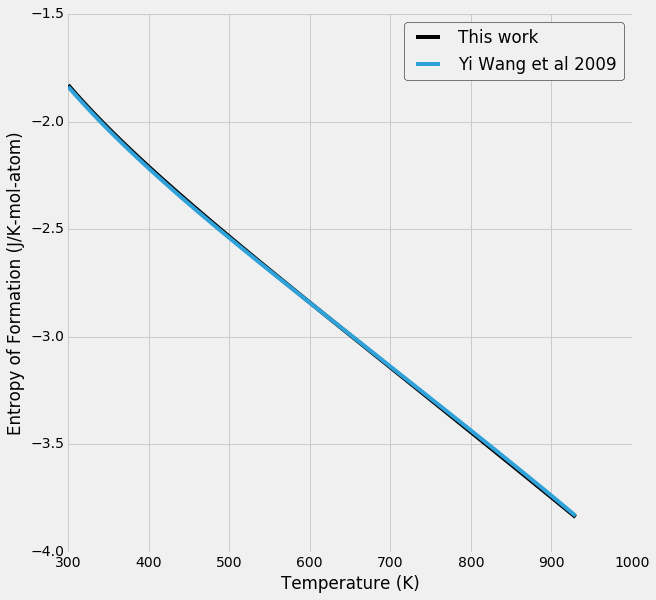

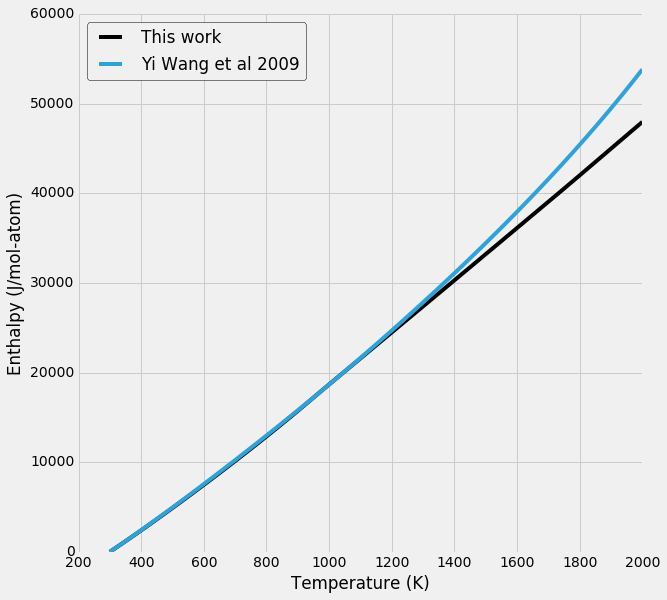

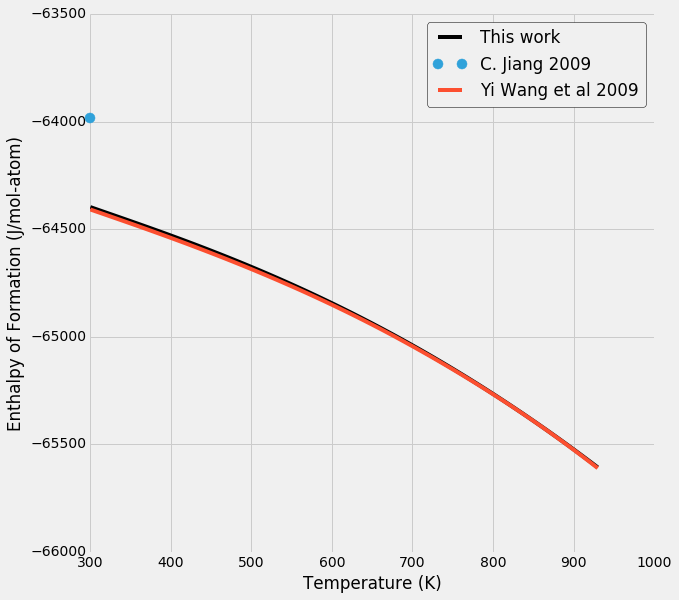

In [11]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", "NI", "VA"], [[0, 1]], datasets)

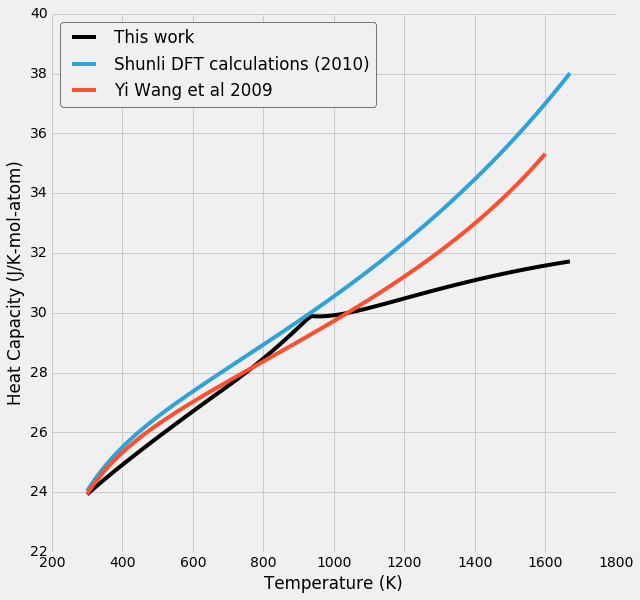

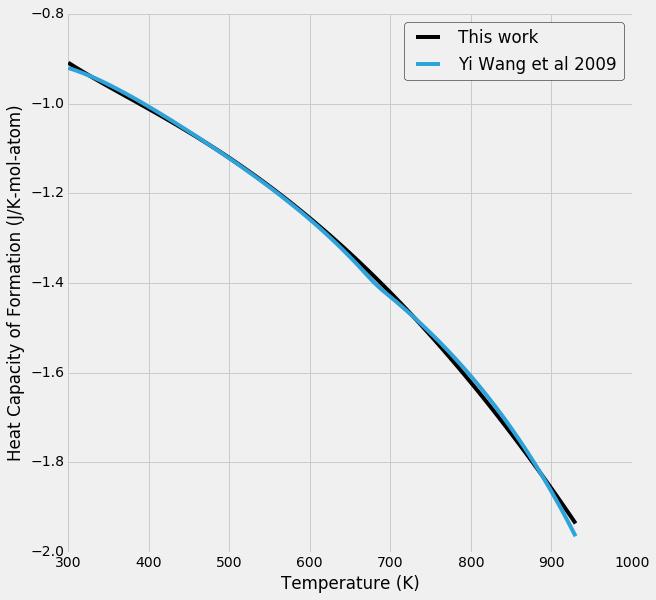

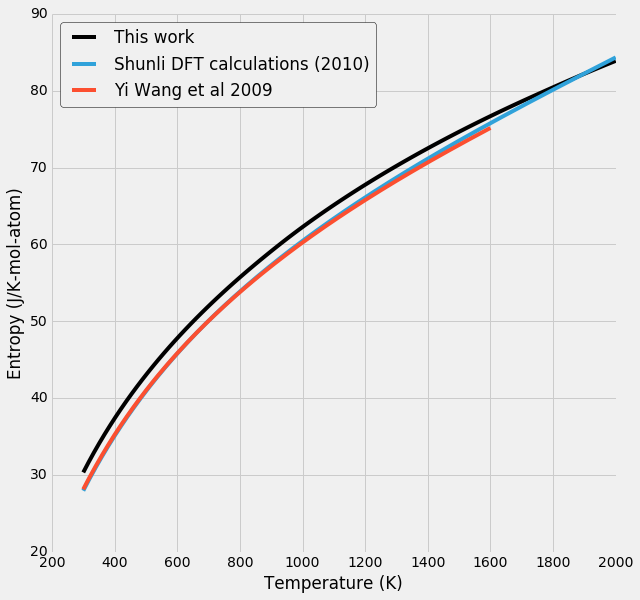

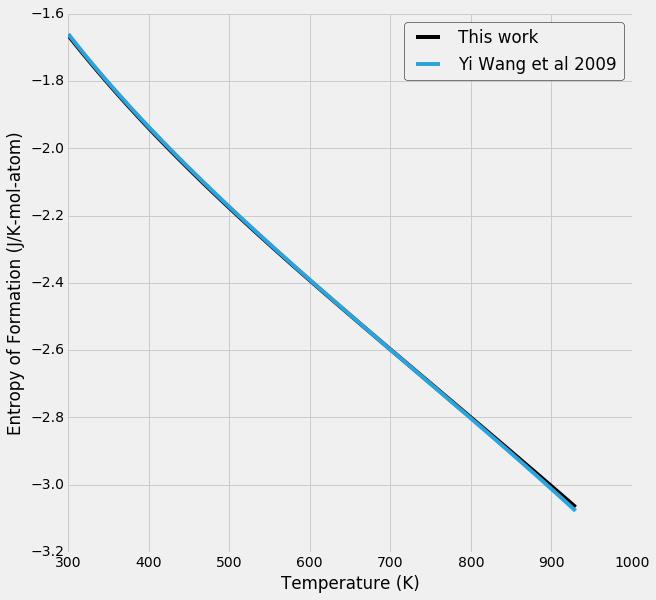

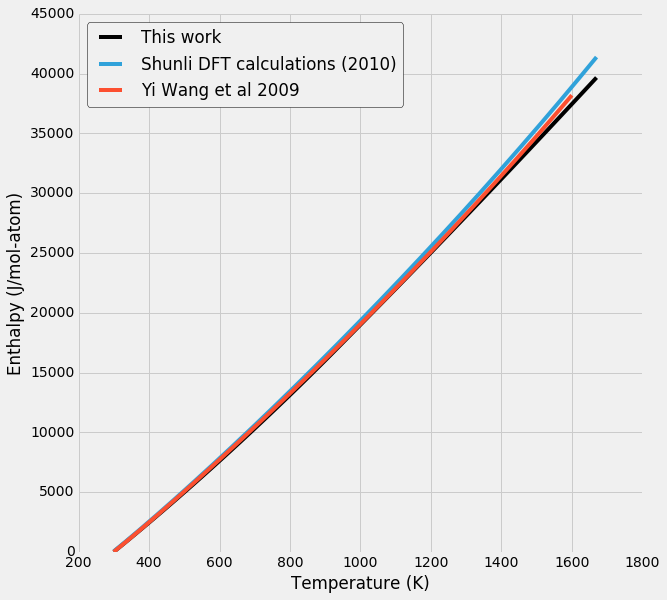

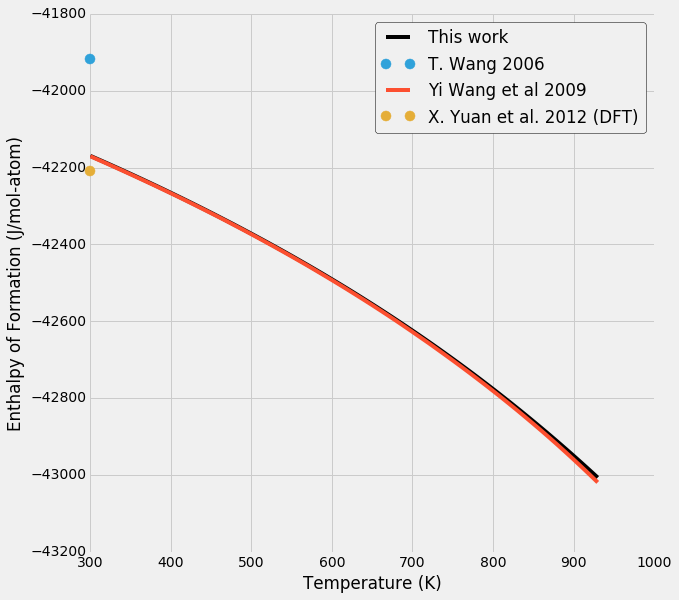

In [12]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

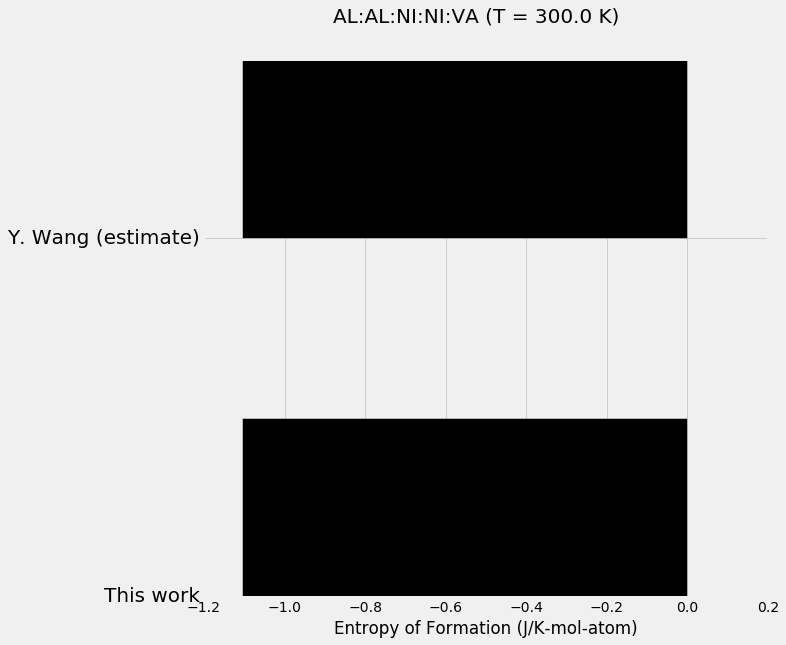

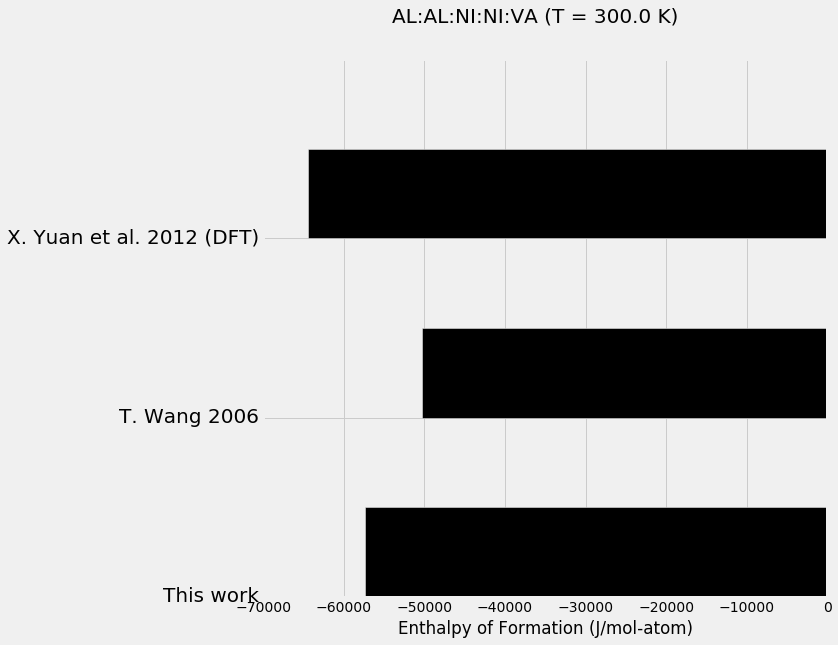

In [13]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "AL", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

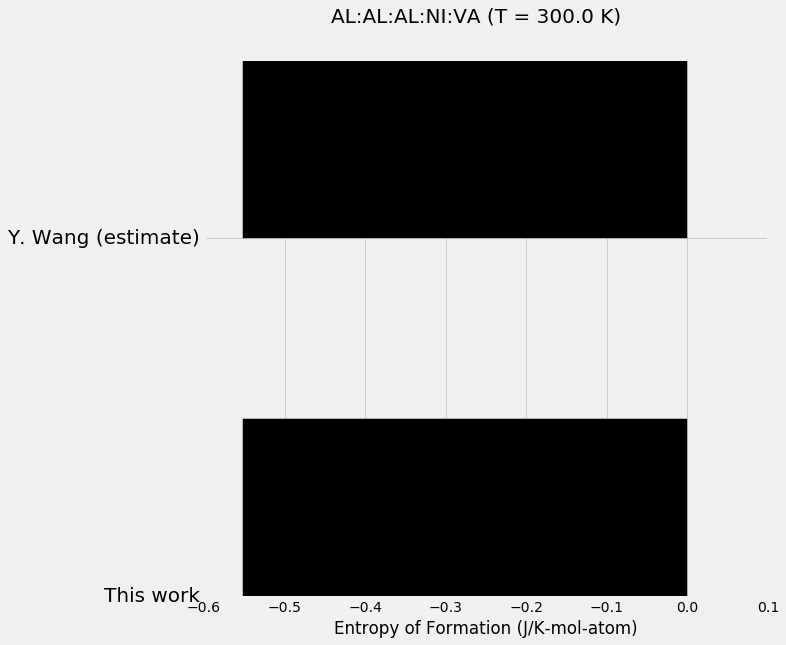

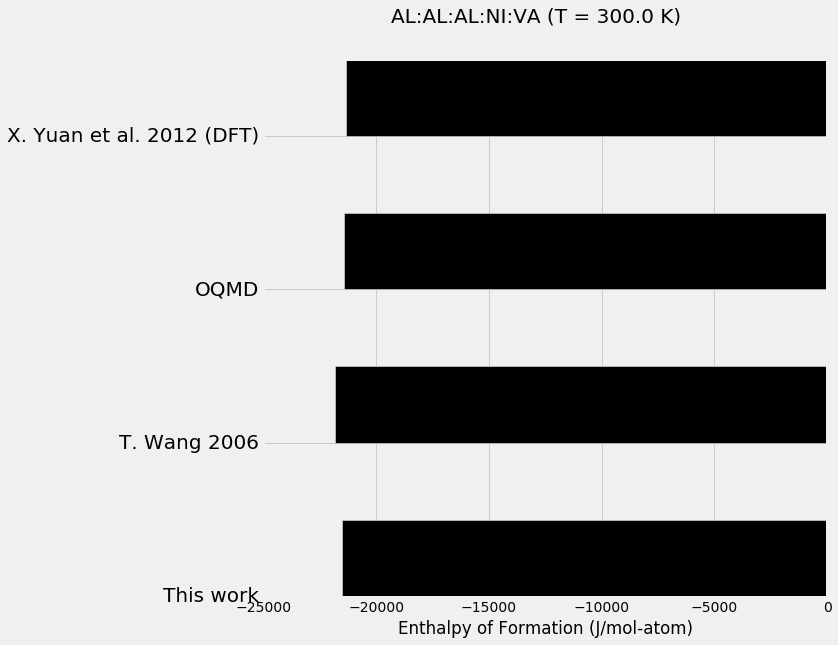

In [14]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "AL", "AL", "NI", "VA"], [[0,1,2,3]], datasets)

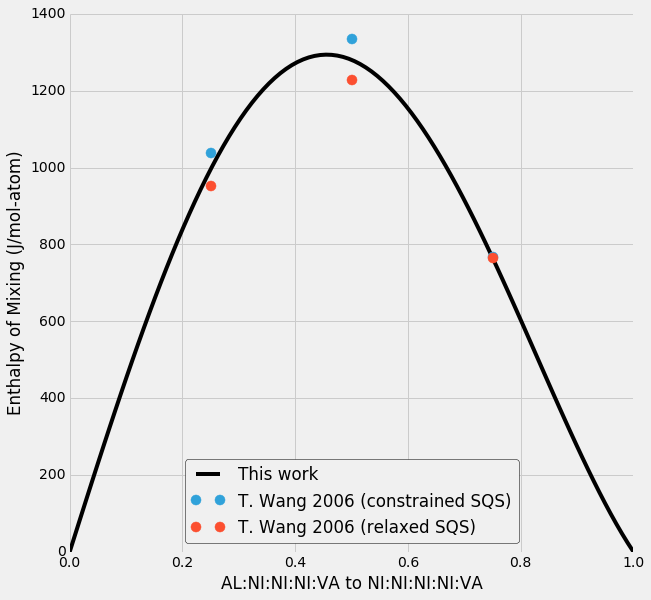

In [15]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

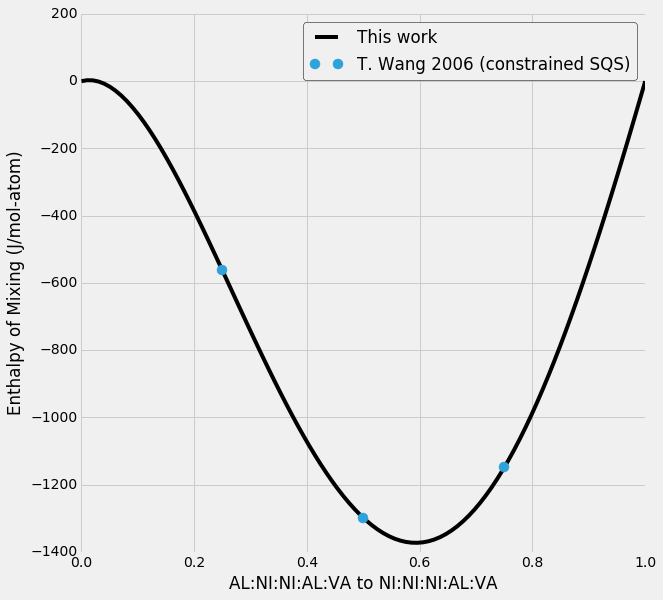

In [16]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "AL", "VA"], [[0,1,2,3]], datasets)

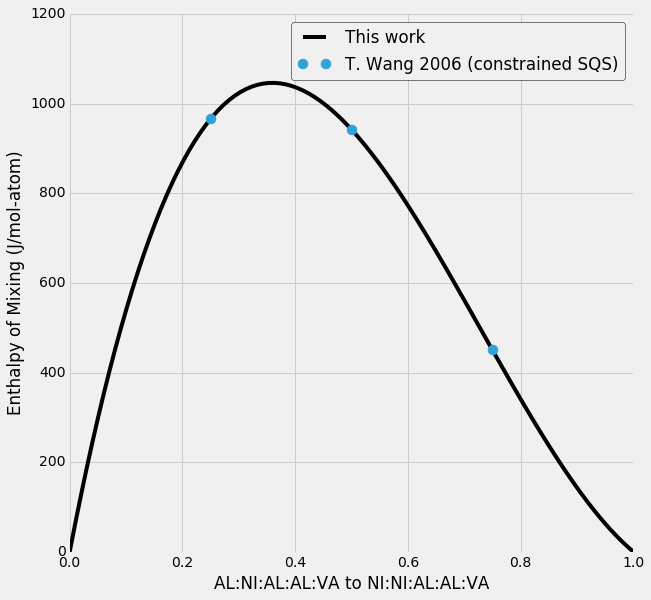

In [17]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "AL", "AL", "VA"], [[0,1,2,3]], datasets)

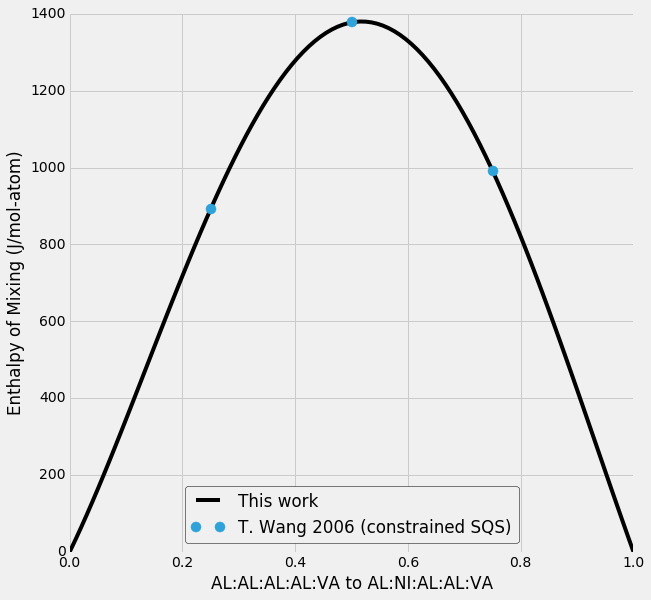

In [18]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", ["AL", "NI"], "AL", "AL", "VA"], [[0,1,2,3]], datasets)

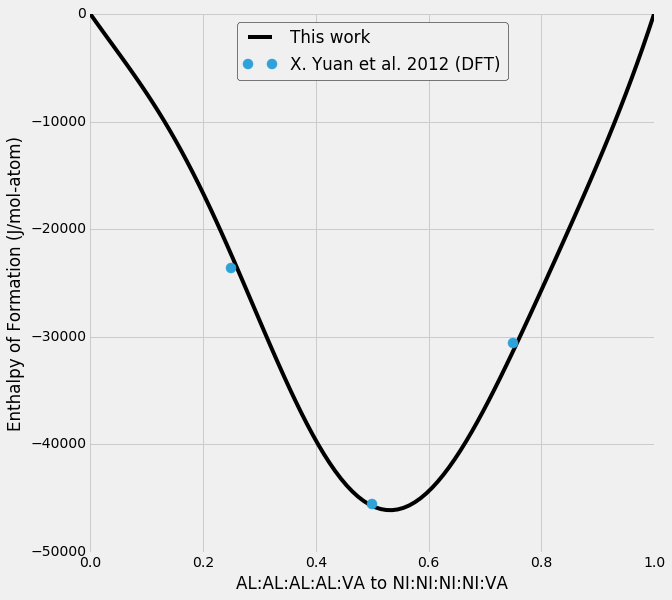

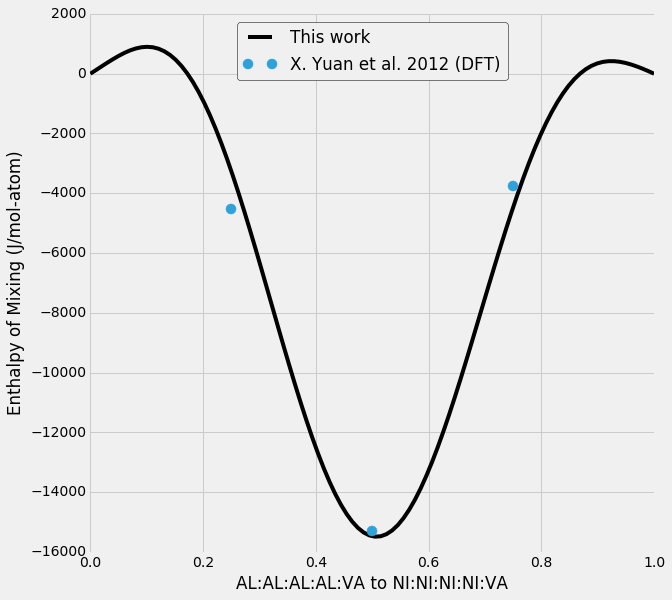

In [19]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], ["AL", "NI"], ["AL", "NI"], ["AL", "NI"], "VA"], [[0,1,2,3]], datasets)

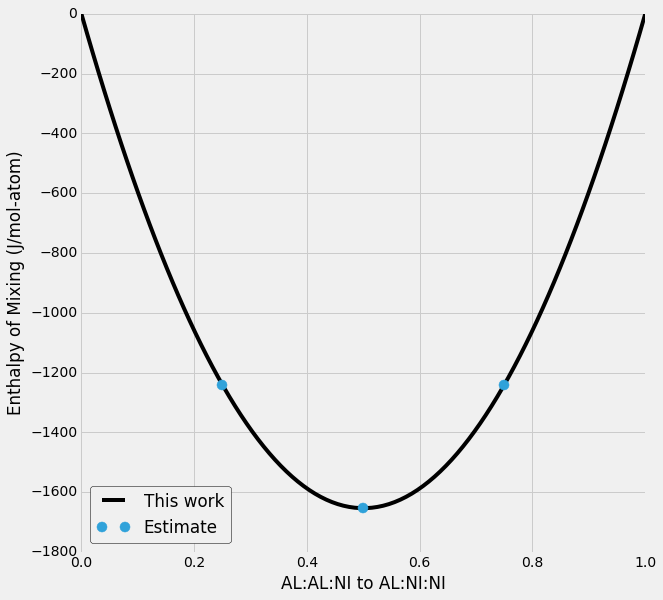

In [20]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "AL3NI2", ["AL", ["AL", "NI"], "NI"], None, datasets)

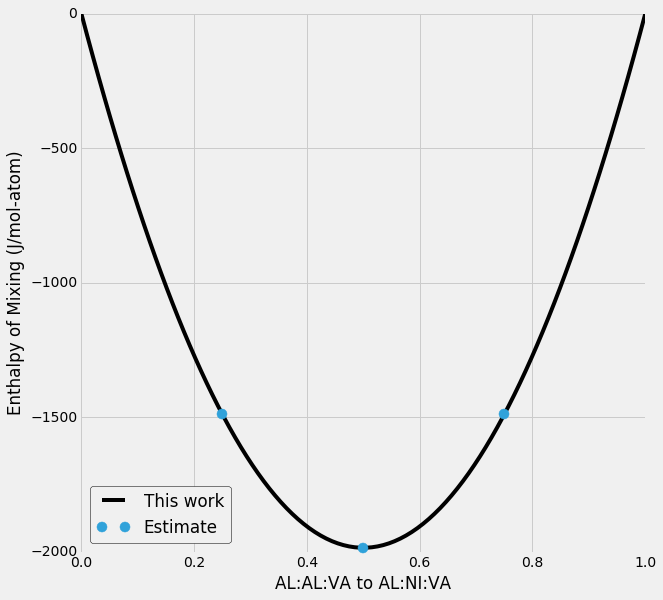

In [21]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "AL3NI2", ["AL", ["AL", "NI"], "VA"], None, datasets)

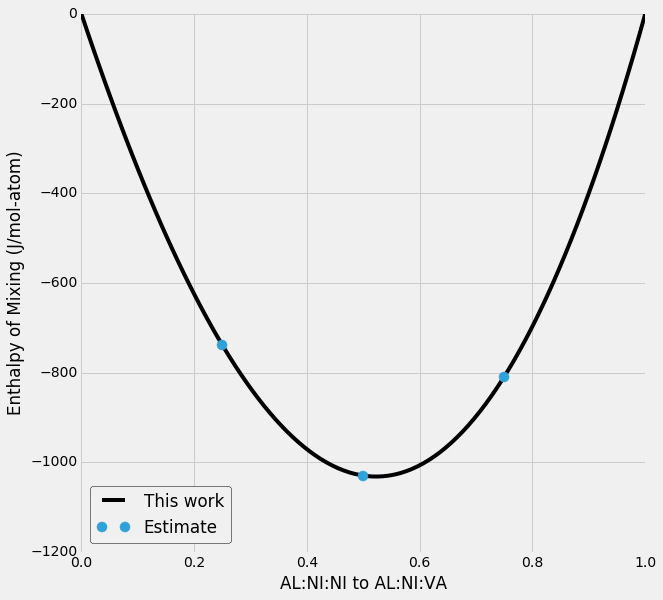

In [22]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "AL3NI2", ["AL", "NI", ["NI", "VA"]], None, datasets)

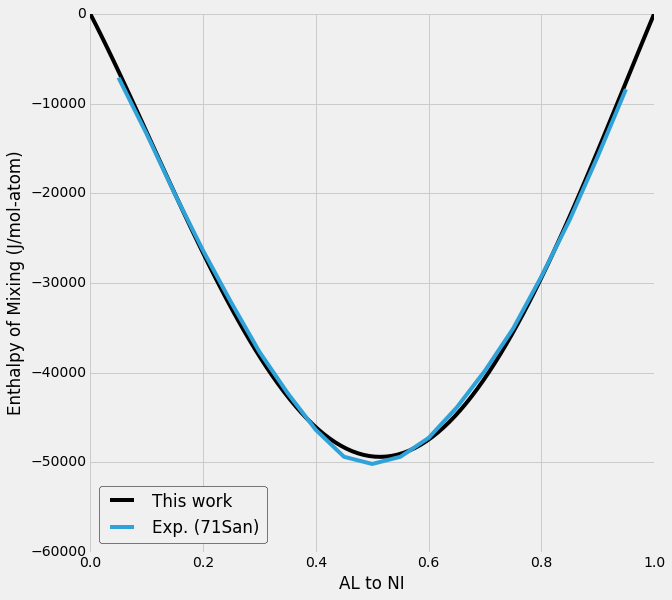

In [23]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "LIQUID", [["AL", "NI"]], None, datasets)

In [24]:
dbf.to_file('AlNi.tdb', if_exists='overwrite')

/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


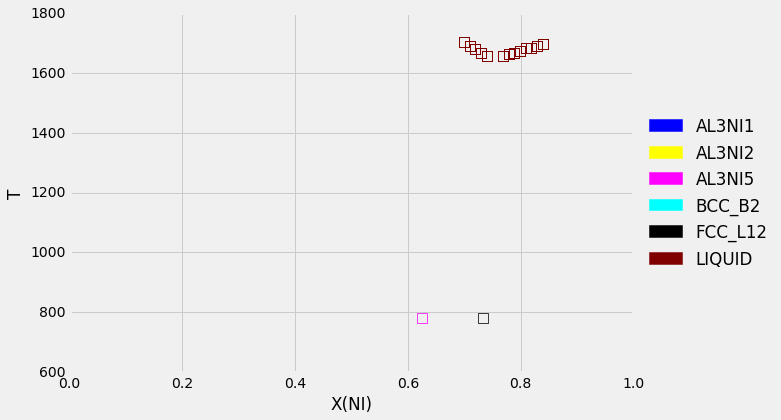

In [25]:
from paramselect import multi_plot
from pycalphad import binplot, Database
import pycalphad.variables as v
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))
#binplot(dbf, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()),
#        {v.X('NI'): (0,1,0.02), v.T: (300, 2000, 30), v.P: 101325}, ax=fig.gca())
multi_plot(None, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()), datasets, ax=fig.gca())
fig.show()